# Análise sobre as olimpíadas<img src="https://upload.wikimedia.org/wikipedia/commons/a/a7/Olympic_flag.svg" width="444" height="324" align="right">
## Membros:
- Ana Beatriz Oliveira de Macedo
- Abdul Malik 
- Bruna Bellini Faria
- Heloisa Mariani
- Marina Lara

**Matéria**: 
Storytelling

# Bibliotecas

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import requests
from bs4 import BeautifulSoup
import folium
import plotly.express as px
import datetime
import re
from folium.plugins import StripePattern
import numpy as np
import json
import os
import plotly.offline as offline
import chart_studio.plotly as py
from chart_studio import plotly
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.datasets import load_diabetes
import seaborn as sns; sns.set()
import statistics
import numpy as np

# Análise Mundo

## Dataset original

In [128]:
pd.set_option('display.max_rows', 10,'display.max_columns', None)
df_global= pd.read_csv('./Data/df_final_global.csv')
df_global.drop('Unnamed: 0',axis=1, inplace=True)
df_global

,NOCCode,geometry,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total medalhas paralimpíadas,Ranking medalhas paralimpíadas,Ranking IDH global 2019,IDH 2019,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH 2014,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha
0,ARG,MULTIPOLYGON (((-68.65412350199998 -54.8862443...,Argentina,40117096,0,1,2,3,60,0,5,4,9,63,46,0.845,3,1,0,4,40,0.836,74,50,542122,70
1,ARM,MULTIPOLYGON (((45.54717289200002 40.621552633...,Armenia,3268500,0,2,2,4,47,0,0,0,0,87,81,0.776,1,3,0,4,85,0.733,16,48,204281,49
2,AUS,MULTIPOLYGON (((158.8657332690001 -54.74993254...,Australia,22880619,17,7,22,46,6,21,29,30,80,8,8,0.944,8,11,10,29,2,0.935,511,8,44776,16
3,AUT,"POLYGON ((15.16179244000011 48.93722076400007,...",Austria,8452835,1,1,5,7,33,1,5,3,9,49,18,0.922,0,0,1,1,23,0.885,319,68,26497,7
4,AZE,MULTIPOLYGON (((45.07499903900006 39.749820272...,Azerbaijan,9111100,0,3,4,7,33,14,1,4,19,10,88,0.756,1,7,10,18,78,0.751,44,14,207070,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,UKR,MULTIPOLYGON (((29.80746504000015 45.614325262...,Ukraine,45644419,1,6,12,19,16,24,47,27,98,6,74,0.779,2,5,4,11,81,0.747,135,23,338106,61
72,USA,MULTIPOLYGON (((-155.6065189699999 20.13795556...,United States of America,313382000,39,41,33,113,1,37,36,31,104,3,17,0.926,46,37,38,121,8,0.915,2827,1,110853,39
73,UZB,MULTIPOLYGON (((71.75730432100013 39.903095194...,Uzbekistan,29123400,3,0,2,5,42,8,5,6,19,16,106,0.720,4,2,7,13,114,0.675,35,20,832097,78
74,VEN,MULTIPOLYGON (((-61.39027141599988 8.580580853...,Venezuela,27150095,1,3,0,4,47,3,2,2,7,38,113,0.711,0,2,1,3,71,0.762,15,54,1810006,99


In [6]:
round(df_global.describe(),2)

,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total medalhas paralimpíadas,Ranking medalhas paralimpíadas,Ranking IDH global 2019,IDH 2019,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH 2014,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha,Porcentagem de habitante por medalha
count,7.600000e+01,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00,76.00
mean,1.765713e+08,4.80,4.71,5.75,15.26,35.39,7.47,7.51,8.18,23.17,41.74,57.04,0.82,4.59,4.30,5.17,14.07,56.12,0.80,221.08,36.76,1582591.46,54.67,7.10
std,9.538705e+08,7.62,7.25,6.86,20.84,22.45,13.71,11.58,11.81,35.62,28.12,44.97,0.12,7.53,6.03,6.73,19.57,43.18,0.11,386.46,23.49,5345086.26,37.09,18.00
min,8.680000e+02,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.40,0.00,0.00,0.00,1.00,1.00,0.44,1.00,1.00,390.00,2.00,0.00
25%,5.546718e+06,1.00,1.00,1.00,4.00,15.25,0.00,0.75,1.00,2.75,16.75,19.00,0.76,0.00,1.00,1.00,2.75,20.75,0.74,24.00,15.75,49690.75,22.25,0.30
50%,1.641450e+07,2.00,2.00,2.50,7.00,33.00,3.00,3.00,3.00,9.00,38.50,47.50,0.84,2.00,2.00,2.50,8.00,48.50,0.81,71.00,34.50,177770.00,49.50,1.33
75%,5.313420e+07,6.00,6.00,8.00,19.25,47.00,7.25,10.00,12.00,24.00,65.50,84.25,0.92,6.00,6.00,6.25,18.00,82.00,0.89,310.00,54.75,935489.00,80.25,4.17
max,8.183020e+09,39.00,41.00,33.00,113.00,77.00,96.00,60.00,51.00,207.00,87.00,188.00,0.96,46.00,37.00,38.00,121.00,174.00,0.94,2827.00,82.00,44338998.00,142.00,100.00


## Análise de todos os países classificados antes do Brasil nas olimpíadas

In [62]:
df_medalhas = df_global.iloc[[72, 12,42,29,2,53,28,10,9]]
df_medalhas = df_medalhas.rename_axis('index').reset_index()
df_medalhas = df_medalhas.drop(['index'], axis=1)
df_medalhas.insert(10,'Atletas',[626,413,602,383,482,278,391,381,302],True)
df_medalhas.insert(11,'Modalidades',[45,42,46,35,41,31,41,40,35],True)
df_medalhas

,NOCCode,geometry,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro paralimpíadas,Atletas,Modalidades,Prata paralimpíadas,Bronze paralimpíadas,Total medalhas paralimpíadas,Ranking medalhas paralimpíadas,Ranking IDH global 2019,IDH 2019,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH 2014,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha,Porcentagem de habitante por medalha
0,USA,MULTIPOLYGON (((-155.6065189699999 20.13795556...,United States of America,313382000,39,41,33,113,1,37,626,45,36,31,104,3,17,0.926,46,37,38,121,8,0.915,2827,1,110853,39,0.04
1,CHN,MULTIPOLYGON (((111.2046004570001 15.779242255...,China,1347350000,38,32,18,88,2,96,413,42,60,51,207,1,85,0.761,26,18,26,70,90,0.727,605,2,2227024,107,0.17
2,JPN,MULTIPOLYGON (((141.4679468110001 24.213771877...,Japan,127650000,27,14,17,58,5,13,602,46,15,23,51,11,19,0.919,12,8,21,41,20,0.891,497,7,256841,54,0.20
3,GBR,MULTIPOLYGON (((-6.287505662999905 49.91400788...,United Kingdom,62262000,22,21,22,65,4,41,383,35,38,45,124,2,13,0.932,27,23,17,67,14,0.907,876,3,71075,24,0.11
4,AUS,MULTIPOLYGON (((158.8657332690001 -54.74993254...,Australia,22880619,17,7,22,46,6,21,482,41,29,30,80,8,8,0.944,8,11,10,29,2,0.935,511,8,44776,16,0.20
5,NLD,MULTIPOLYGON (((-68.23729407499985 12.02680084...,Netherlands,16731770,10,12,14,36,9,25,278,31,17,17,59,5,8,0.944,8,7,4,19,5,0.922,415,13,40317,15,0.24
6,FRA,MULTIPOLYGON (((55.5013126960001 -20.873223565...,France,65350000,10,12,11,33,10,11,391,41,15,28,54,14,26,0.901,10,18,14,42,22,0.888,836,5,78169,27,0.12
7,CAN,MULTIPOLYGON (((-65.61058508999994 43.42816803...,Canada,34771400,7,6,11,24,11,5,381,40,10,6,21,23,16,0.929,4,3,15,22,9,0.913,499,10,69682,23,0.20
8,BRA,MULTIPOLYGON (((-48.54259192599997 -27.8166643...,Brazil,192376496,7,6,8,21,12,22,302,35,20,30,72,7,84,0.765,7,6,6,19,75,0.755,127,12,1514775,93,0.79


In [200]:
trace1 = go.Bar(
x=df_medalhas['Países'],
y=df_medalhas['Bronze Tokyo'],
name='Bronze',
marker_color='orange'
)
trace2 = go.Bar(
    x=df_medalhas['Países'],
    y=df_medalhas['Prata Tokyo'],
    name='Prata',
    marker_color='silver'
)
trace3 = go.Bar(
    x=df_medalhas['Países'],
    y = df_medalhas['Ouro Tokyo'],
    name='Ouro',
    marker_color='gold'
)
trace4 = go.Scatter(
    x=df_medalhas['Países'],
    y=df_medalhas['Modalidades'],name='Total de modalidades',
    line = dict(color='blue', width=2)
)

data=[trace1, trace2, trace3, trace4]
layout= go.Layout(
    barmode= 'stack',
    title='Número de medalhas e modalidades em de Tokyo 2020',
    xaxis={'title': 'Países', 'tickangle' : 25},
    yaxis=dict(title='Quantidade'),
    height=600, width=1100
)

fig= go.Figure(data=data, layout=layout)
fig.show()

In [199]:
trace = go.Scatter(x = df_medalhas['Atletas'],
                   y = df_medalhas['Total medalhas Tokyo'],
                   mode = 'markers',marker_color='darkblue')
data = [trace]
layout= go.Layout(title='Comparação entre total de medalhas e atletas',height=600, width=1100,yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Países', 'tickangle' : 25})
fig= go.Figure(data=data, layout=layout)
fig.show()

## Análise de todos os países classificados antes do Brasil nas paraolimpíadas

In [123]:
df_param = df_global.iloc[[12,29,72,62,53,71,9]]
df_param = df_param.rename_axis('index').reset_index()
df_param = df_param.drop(['index'], axis=1)
df_param

,NOCCode,geometry,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total medalhas paralimpíadas,Ranking medalhas paralimpíadas,Ranking IDH global 2019,IDH 2019,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH 2014,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha
0,CHN,MULTIPOLYGON (((111.2046004570001 15.779242255...,China,1347350000,38,32,18,88,2,96,60,51,207,1,85,0.761,26,18,26,70,90,0.727,605,2,2227024,107
1,GBR,MULTIPOLYGON (((-6.287505662999905 49.91400788...,United Kingdom,62262000,22,21,22,65,4,41,38,45,124,2,13,0.932,27,23,17,67,14,0.907,876,3,71075,24
2,USA,MULTIPOLYGON (((-155.6065189699999 20.13795556...,United States of America,313382000,39,41,33,113,1,37,36,31,104,3,17,0.926,46,37,38,121,8,0.915,2827,1,110853,39
3,RUS,MULTIPOLYGON (((132.4489852220002 42.845404364...,Russia,143056383,20,28,23,71,3,36,33,49,118,4,52,0.824,19,17,20,56,50,0.798,586,4,244123,53
4,NLD,MULTIPOLYGON (((-68.23729407499985 12.02680084...,Netherlands,16731770,10,12,14,36,9,25,17,17,59,5,8,0.944,8,7,4,19,5,0.922,415,13,40317,15
5,UKR,MULTIPOLYGON (((29.80746504000015 45.614325262...,Ukraine,45644419,1,6,12,19,16,24,47,27,98,6,74,0.779,2,5,4,11,81,0.747,135,23,338106,61
6,BRA,MULTIPOLYGON (((-48.54259192599997 -27.8166643...,Brazil,192376496,7,6,8,21,12,22,20,30,72,7,84,0.765,7,6,6,19,75,0.755,127,12,1514775,93


In [182]:
trace1 = go.Bar(
x=df_param['Países'],
y=df_param['Bronze paralimpíadas'],
name='Bronze',
marker_color='orange'
)
trace2 = go.Bar(
    x=df_param['Países'],
    y=df_param['Prata paralimpíadas'],
    name='Prata',
    marker_color='silver'
)
trace3 = go.Bar(
    x=df_param['Países'],
    y = df_param['Ouro paralimpíadas'],
    name='Ouro',
    marker_color='gold'
)
trace4 = go.Scatter(
    x=df_param['Países'],
    y=df_param['Total medalhas paralimpíadas'],name='Total de medalhas',
    line = dict(color='blue', width=2)
)

data=[trace1, trace2, trace3, trace4]
layout= go.Layout(
    barmode= 'stack',
    title='Número de medalhas de paralimpíadas 2020',
    xaxis={'title': 'Países', 'tickangle' : 25},
    yaxis=dict(title='Quantidade'),
    height=600, width=1100
)

fig= go.Figure(data=data, layout=layout)
fig.show()

## Análise de comparação entre IDH 2019, total de medalhas olímpicas e paralímpicas, e rankings

In [129]:
df_idh=  df_global.iloc[[18,2,53,29,10,72,42,23,9]]
df_idh = df_idh.rename_axis('index').reset_index()
df_idh = df_idh.drop(['index'], axis=1)
df_idh

,NOCCode,geometry,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total medalhas paralimpíadas,Ranking medalhas paralimpíadas,Ranking IDH global 2019,IDH 2019,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH 2014,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha
0,DEU,MULTIPOLYGON (((6.742198113000114 53.578355210...,Germany,8183020000,10,11,16,37,8,13,12,18,43,12,6,0.947,17,10,15,42,6,0.916,992,6,8249012,29
1,AUS,MULTIPOLYGON (((158.8657332690001 -54.74993254...,Australia,22880619,17,7,22,46,6,21,29,30,80,8,8,0.944,8,11,10,29,2,0.935,511,8,44776,16
2,NLD,MULTIPOLYGON (((-68.23729407499985 12.02680084...,Netherlands,16731770,10,12,14,36,9,25,17,17,59,5,8,0.944,8,7,4,19,5,0.922,415,13,40317,15
3,GBR,MULTIPOLYGON (((-6.287505662999905 49.91400788...,United Kingdom,62262000,22,21,22,65,4,41,38,45,124,2,13,0.932,27,23,17,67,14,0.907,876,3,71075,24
4,CAN,MULTIPOLYGON (((-65.61058508999994 43.42816803...,Canada,34771400,7,6,11,24,11,5,10,6,21,23,16,0.929,4,3,15,22,9,0.913,499,10,69682,23
5,USA,MULTIPOLYGON (((-155.6065189699999 20.13795556...,United States of America,313382000,39,41,33,113,1,37,36,31,104,3,17,0.926,46,37,38,121,8,0.915,2827,1,110853,39
6,JPN,MULTIPOLYGON (((141.4679468110001 24.213771877...,Japan,127650000,27,14,17,58,5,13,15,23,51,11,19,0.919,12,8,21,41,20,0.891,497,7,256841,54
7,ESP,MULTIPOLYGON (((-17.88512122299994 27.79791901...,Spain,46196278,3,8,6,17,17,9,15,12,36,15,25,0.904,7,4,6,17,26,0.876,151,17,305935,58
8,BRA,MULTIPOLYGON (((-48.54259192599997 -27.8166643...,Brazil,192376496,7,6,8,21,12,22,20,30,72,7,84,0.765,7,6,6,19,75,0.755,127,12,1514775,93


In [131]:
#Comparação entre o Ranking medalhas Tokyo,Ranking medalhas paralimpíadas, Ranking IDH global 2019
fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_idh['Países'], y=df_idh['Ranking medalhas Tokyo'],
                    mode='lines+markers',
                    name='  Olímpico  de medalhas', line = dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_idh['Países'], y=df_idh['Ranking medalhas paralimpíadas'],
                    mode='lines+markers',
                    name='Paralímpico de medalhas', line = dict(color='purple', width=2)))
fig.add_trace(go.Bar(x=df_idh['Países'], y=df_idh['Ranking IDH global 2019'], name='IDH 2019', marker_color=px.colors.qualitative.Set3[7]))                 

layout= go.Layout(title={
                    'text' : 'Ranking de total medalhas olímpica e paralímpica de Tokyo X Ranking IDH de 2019',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Classificação no ranking'},
                   xaxis={'title': 'Países', 'tickangle' : 45},
                   legend_title="Ranking:",
                   height=600, width=900)
fig.update_layout(hovermode='x unified')
fig.show()

In [114]:

fig = go.Figure(layout=layout)
fig.add_trace(go.Scatter(x=df_global['Países'], y=df_global['Ranking medalhas Tokyo'],
                    mode='lines+markers',
                    name='  Olímpico  de medalhas', line = dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=df_global['Países'], y=df_global['Ranking medalhas paralimpíadas'],
                    mode='lines+markers',
                    name='Paralímpico de medalhas', line = dict(color='purple', width=2)))
fig.add_trace(go.Bar(x=df_global['Países'], y=df_global['Ranking IDH global 2019'], name='IDH 2019', marker_color=px.colors.qualitative.Set3[7]))                 

layout= go.Layout(title={
                    'text' : 'Comparação entre o ranking do total medalhas olímpica e paralímpica de Tokyo, com o ranking do IDH de 2019',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Classificação no ranking'},
                   xaxis={'title': 'Países', 'tickangle' : 75},
                   legend_title="Ranking:",
                   height=600, width=1800)
fig.update_layout(hovermode='x unified')
fig.show()

## Análise com mapa de informações de medalhas e populaçoes

In [61]:
for p in range(77):
        por= (df_global['População por medalhas']*100)/df_global['População']
df_global= df_global.assign(porcentagem = por)
df_global['porcentagem']= df_global['porcentagem'].round(2)
df_global = df_global.rename(columns={'porcentagem':'Porcentagem de habitante por medalha'})
df_global

,NOCCode,geometry,Países,População,Ouro Tokyo,Prata Tokyo,Bronze Tokyo,Total medalhas Tokyo,Ranking medalhas Tokyo,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total medalhas paralimpíadas,Ranking medalhas paralimpíadas,Ranking IDH global 2019,IDH 2019,Ouro Rio,Prata Rio,Bronze Rio,Total medalhas Rio,Ranking IDH global 2014,IDH 2014,Total medalhas,Ranking total olimpíadas,População por medalhas,Ranking pop por medalha,Porcentagem de habitante por medalha
0,ARG,MULTIPOLYGON (((-68.65412350199998 -54.8862443...,Argentina,40117096,0,1,2,3,60,0,5,4,9,63,46,0.845,3,1,0,4,40,0.836,74,50,542122,70,1.35
1,ARM,MULTIPOLYGON (((45.54717289200002 40.621552633...,Armenia,3268500,0,2,2,4,47,0,0,0,0,87,81,0.776,1,3,0,4,85,0.733,16,48,204281,49,6.25
2,AUS,MULTIPOLYGON (((158.8657332690001 -54.74993254...,Australia,22880619,17,7,22,46,6,21,29,30,80,8,8,0.944,8,11,10,29,2,0.935,511,8,44776,16,0.20
3,AUT,"POLYGON ((15.16179244000011 48.93722076400007,...",Austria,8452835,1,1,5,7,33,1,5,3,9,49,18,0.922,0,0,1,1,23,0.885,319,68,26497,7,0.31
4,AZE,MULTIPOLYGON (((45.07499903900006 39.749820272...,Azerbaijan,9111100,0,3,4,7,33,14,1,4,19,10,88,0.756,1,7,10,18,78,0.751,44,14,207070,50,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,UKR,MULTIPOLYGON (((29.80746504000015 45.614325262...,Ukraine,45644419,1,6,12,19,16,24,47,27,98,6,74,0.779,2,5,4,11,81,0.747,135,23,338106,61,0.74
72,USA,MULTIPOLYGON (((-155.6065189699999 20.13795556...,United States of America,313382000,39,41,33,113,1,37,36,31,104,3,17,0.926,46,37,38,121,8,0.915,2827,1,110853,39,0.04
73,UZB,MULTIPOLYGON (((71.75730432100013 39.903095194...,Uzbekistan,29123400,3,0,2,5,42,8,5,6,19,16,106,0.720,4,2,7,13,114,0.675,35,20,832097,78,2.86
74,VEN,MULTIPOLYGON (((-61.39027141599988 8.580580853...,Venezuela,27150095,1,3,0,4,47,3,2,2,7,38,113,0.711,0,2,1,3,71,0.762,15,54,1810006,99,6.67


# Análise Brasil

## Dataset original

In [134]:
df_brasil= pd.read_csv('./Data/df_final_brasil.csv')
df_brasil.drop('Unnamed: 0',axis=1, inplace=True)
df_brasil

,Ano,País sede,Ouro olimpíadas,Prata olimpíadas,Bronze olimpíadas,Total olimpíadas,Colocação olimpíadas,Atletas olimpíadas,Homens olimpíadas,Mulheres olimpíadas,Modalidades olimpíadas,Bolsa atleta olimpíadas,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total paralimpíadas,Colocação paralimpíadas,Atletas paralimpíadas,Homens paralimpíadas,Mulheres paralimpíadas,Modalidades paralimpíadas,Valor recebido pelo COB,Repassado as confederações
0,2020,Tóquio,7,6,8,21,12,302,162,140,35,242,22,20,30,72,7,259,163,96,20,329.0,121.3
1,2016,Rio,7,6,6,19,13,465,256,209,40,358,14,29,29,72,8,286,184,102,22,700.0,258.0
2,2012,Londres,3,5,9,17,22,259,136,123,32,114,21,14,8,43,7,182,133,69,18,677.2,250.4
3,2008,Pequim,3,4,10,17,22,277,144,133,32,156,16,14,17,47,9,188,133,55,17,615.4,297.2
4,2004,Atenas,5,2,3,10,16,247,125,122,0,0,14,12,7,33,14,98,76,22,13,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1960,Roma,0,0,2,2,39,81,80,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
16,1956,Melbourne,1,0,0,1,24,48,47,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
17,1952,Helsinque,1,0,2,3,24,108,103,5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
18,1948,Londres,0,0,1,1,34,81,70,11,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0


## Análise das medalhas olimpícas e paraolimpícas brasileiras

In [176]:
medalha = px.line(df_brasil, x='Ano', y='Total olimpíadas', title='Medalhas ao longo dos anos',
                  text='País sede')

medalha.update_traces(textposition='top center')
medalha.show()

In [164]:
trace1 = go.Bar(
    x=df_brasil['Ano'],
    y=df_brasil['Bronze olimpíadas'],
    name='Bronze',
    marker_color='orange'
    )
trace2 = go.Bar(
    x=df_brasil['Ano'],
    y=df_brasil['Prata olimpíadas'],
    name='Prata',
    marker_color='silver'
    )
trace3 = go.Bar(
    x=df_brasil['Ano'],
    y = df_brasil['Ouro olimpíadas'],
    name='Ouro',
    marker_color='gold'
    )
trace4 = go.Scatter(
    x=df_brasil['Ano'],
    y=df_brasil['Total olimpíadas'],name='Total de medalhas',text=df_brasil['País sede']
    )
data=[trace1, trace2, trace3, trace4]
layout= go.Layout(
    barmode= 'stack',
    title='Evolução do número de medalhas',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Total')
    )
fig= go.Figure(data=data, layout=layout)
fig.show()

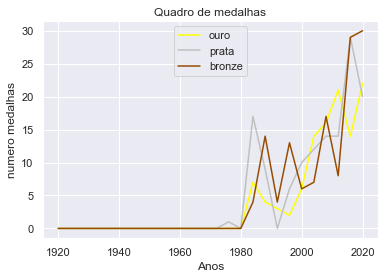

In [174]:
plt.figure(figsize=(6, 4))
plt.plot(a, o, color='yellow') 
plt.plot(a, p, color='#C0C0C0')
plt.plot(a, b, color='#964B00') 
plt.xlabel("Anos")
plt.ylabel("numero medalhas")
plt.grid(True)
plt.title('Quadro de medalhas')
plt.legend(["ouro", "prata", "bronze"], loc=9)
plt.savefig('comparacao_medalhas_paralimpicas.png')
plt.show()

## Análise dos genêros nas olimpíadas

In [137]:
Homens= go.Scatter(x=df_brasil['Ano'], y=df_brasil['Homens olimpíadas'],
                    mode='lines+markers',
                    name='Homens', line = dict(color='blue', width=2))
Mulheres= go.Scatter(x=df_brasil['Ano'], y=df_brasil['Mulheres olimpíadas'],
                    mode='lines+markers',
                    name='Mulheres', line = dict(color='pink', width=2))
data= [Homens, Mulheres]
layout= go.Layout(title={
                    'text' : 'Evolução de participantes brasileiros em olimpíadas',
                    'x' : 0.5,
                    'xref' : 'paper',
                    'xanchor' : 'center'},
                   yaxis={'title':'Quantidade de atletas'},
                   xaxis={'title': 'Ano', 'tickangle' : 45},
                   legend_title="Legenda:",
                    height=500, width=900)
fig = go.Figure(data= data, layout=layout)
fig.show()

## Análises de informações das ultimas 4 olimpíadas

In [139]:
df_brasil.insert(23, "Porcentagem relação bolsa atleta", [80.0, 76.0, 44.0, 56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0], True)
df_brasil

,Ano,País sede,Ouro olimpíadas,Prata olimpíadas,Bronze olimpíadas,Total olimpíadas,Colocação olimpíadas,Atletas olimpíadas,Homens olimpíadas,Mulheres olimpíadas,Modalidades olimpíadas,Bolsa atleta olimpíadas,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total paralimpíadas,Colocação paralimpíadas,Atletas paralimpíadas,Homens paralimpíadas,Mulheres paralimpíadas,Modalidades paralimpíadas,Valor recebido pelo COB,Repassado as confederações,Porcentagem relação bolsa atleta
0,2020,Tóquio,7,6,8,21,12,302,162,140,35,242,22,20,30,72,7,259,163,96,20,329.0,121.3,80.0
1,2016,Rio,7,6,6,19,13,465,256,209,40,358,14,29,29,72,8,286,184,102,22,700.0,258.0,76.0
2,2012,Londres,3,5,9,17,22,259,136,123,32,114,21,14,8,43,7,182,133,69,18,677.2,250.4,44.0
3,2008,Pequim,3,4,10,17,22,277,144,133,32,156,16,14,17,47,9,188,133,55,17,615.4,297.2,56.0
4,2004,Atenas,5,2,3,10,16,247,125,122,0,0,14,12,7,33,14,98,76,22,13,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,1960,Roma,0,0,2,2,39,81,80,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
16,1956,Melbourne,1,0,0,1,24,48,47,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
17,1952,Helsinque,1,0,2,3,24,108,103,5,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
18,1948,Londres,0,0,1,1,34,81,70,11,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [140]:
df_atleta = df_brasil[0:4]
df_atleta

,Ano,País sede,Ouro olimpíadas,Prata olimpíadas,Bronze olimpíadas,Total olimpíadas,Colocação olimpíadas,Atletas olimpíadas,Homens olimpíadas,Mulheres olimpíadas,Modalidades olimpíadas,Bolsa atleta olimpíadas,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total paralimpíadas,Colocação paralimpíadas,Atletas paralimpíadas,Homens paralimpíadas,Mulheres paralimpíadas,Modalidades paralimpíadas,Valor recebido pelo COB,Repassado as confederações,Porcentagem relação bolsa atleta
0,2020,Tóquio,7,6,8,21,12,302,162,140,35,242,22,20,30,72,7,259,163,96,20,329.0,121.3,80.0
1,2016,Rio,7,6,6,19,13,465,256,209,40,358,14,29,29,72,8,286,184,102,22,700.0,258.0,76.0
2,2012,Londres,3,5,9,17,22,259,136,123,32,114,21,14,8,43,7,182,133,69,18,677.2,250.4,44.0
3,2008,Pequim,3,4,10,17,22,277,144,133,32,156,16,14,17,47,9,188,133,55,17,615.4,297.2,56.0


In [166]:
trace1 = go.Bar(
    x=df_atleta['Ano'],
    y=df_atleta['Modalidades olimpíadas'],
    name='Modalidades',
    marker_color='darkblue'
    )
trace2 = go.Scatter(
    x=df_atleta['Ano'],
    y=df_atleta['Colocação olimpíadas'],name='Colocação geral',text=df_atleta['País sede'],
    marker_color='fuchsia'
    )
data=[trace1, trace2]
layout= go.Layout(
    barmode= 'stack',
    title='Evolução da classificão final do Brasil',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Modalidades')
    )
fig= go.Figure(data=data, layout=layout)
fig.show()

In [165]:
fig = go.Figure(data=[
    go.Bar(name='Valor recebido pelo COB', y=df_atleta['Valor recebido pelo COB'], x=df_atleta['País sede'],
          marker_color='darkblue',text=df_atleta['Valor recebido pelo COB'],textposition='outside'),
    go.Bar(name='Repassado as confederações', x=df_atleta['País sede'], y=df_atleta['Repassado as confederações'],
          marker_color='purple',text=df_atleta['Repassado as confederações'],textposition='outside')
])
fig.update_layout(barmode='group',title_text='Investimento brasileiro nas olimpíadas(Milhões)')
fig.show()

In [170]:
fig = go.Figure(data=[
    go.Bar(name='Investimento(Milhões)', y=df_atleta['Repassado as confederações'], x=df_atleta['País sede'],
          marker_color='darkblue',text=df_atleta['Repassado as confederações'],textposition='outside'),
    go.Bar(name='Total de medalhas', x=df_atleta['País sede'], y=df_atleta['Total olimpíadas'],
          marker_color='purple',text=df_atleta['Total olimpíadas'],textposition='outside')
])
fig.update_layout(barmode='group',title_text='Investimento x Resultado')
fig.show()

In [171]:
porcent=[80.0, 76.0,44.0,56.0]
trace1 = go.Bar(
    x=df_brasil['Ano'],
    y= [60,107,145,121, 247,205,225,197,170,151,109,93,89,84,68,81,48,108,81,21],
    name='Sem bolsa',
    marker_color='darkblue'
    )
trace2 = go.Bar(
    x=df_brasil['Ano'],
    y=[242,358,114,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    name='Com bolsa',
    marker_color='purple'
    )
trace3 = go.Scatter(
    x=df_brasil['Ano'],
    y=porcent,name='Porcentagem com bolsa',text=df_brasil['País sede'],
    marker_color='fuchsia'
    )
data=[trace1, trace2,trace3]
layout= go.Layout(
    barmode= 'stack',
    title='Atletas com auxílio Bolsa Atelta',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Total de atletas')
    )
fig= go.Figure(data=data, layout=layout)
fig.show()

## Análise de probabilidades das olimpíadas e paraolimpíadas

In [161]:
df_brasil.describe()

,Ano,Ouro olimpíadas,Prata olimpíadas,Bronze olimpíadas,Total olimpíadas,Colocação olimpíadas,Atletas olimpíadas,Homens olimpíadas,Mulheres olimpíadas,Modalidades olimpíadas,Bolsa atleta olimpíadas,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total paralimpíadas,Colocação paralimpíadas,Atletas paralimpíadas,Homens paralimpíadas,Mulheres paralimpíadas,Modalidades paralimpíadas,Valor recebido pelo COB,Repassado as confederações,Porcentagem relação bolsa atleta
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1980.800000,1.850000,2.10000,3.550000,7.500000,26.500000,164.000000,111.800000,52.200000,6.950000,43.500000,5.450000,6.600000,6.600000,18.650000,10.650000,65.200000,46.05000,20.150000,6.550000,116.080000,46.345000,12.800000
std,26.168684,2.230766,2.35975,3.203206,6.847973,10.644989,108.857705,50.955708,62.595275,14.339768,98.998937,7.584437,8.623102,9.472398,24.112183,12.579327,90.973449,60.19134,32.857387,7.755982,247.733587,99.828408,27.116901
min,1920.000000,0.000000,0.00000,0.000000,1.000000,12.000000,21.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.000000,0.00000,1.750000,2.000000,18.500000,83.250000,80.750000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1982.000000,1.000000,1.00000,2.000000,3.500000,24.000000,130.000000,107.000000,18.500000,0.000000,0.000000,1.000000,0.500000,2.000000,4.000000,7.000000,31.000000,27.00000,4.000000,3.500000,0.000000,0.000000,0.000000
75%,2001.000000,3.000000,4.25000,6.000000,12.750000,35.000000,230.500000,138.000000,101.000000,0.000000,0.000000,8.750000,12.500000,9.250000,29.250000,24.000000,72.500000,58.75000,19.750000,10.750000,0.000000,0.000000,0.000000
max,2020.000000,7.000000,6.00000,10.000000,21.000000,52.000000,465.000000,256.000000,209.000000,40.000000,358.000000,22.000000,29.000000,30.000000,72.000000,37.000000,286.000000,184.00000,102.000000,22.000000,700.000000,297.200000,80.000000


In [178]:
prob_medalhas5 = binom.sf(k=19, n=35, p=0.65) 
print("Probabilidade de {:.1%} ter mais medalhas com a média das modalidades.".format(prob_medalhas5))

Probabilidade de 87.4% ter mais medalhas com a média das modalidades.


In [179]:
prob_medalhas1 = binom.sf(k=19, n=326, p=0.7) 
print("Probabilidade de {:.1%} ter mais medalhas com a média de atletas.".format(prob_medalhas1))

Probabilidade de 100.0% ter mais medalhas com a média de atletas.


In [177]:
prob_medalhas= ((prob_medalhas1+prob_medalhas5)/2)
print("Probabilidade de {:.1%} ter mais medalhas na proxíma edição.".format(prob_medalhas))

Probabilidade de 93.7% ter mais medalhas na proxíma edição.


In [160]:
df_atleta.describe()

,Ano,Ouro olimpíadas,Prata olimpíadas,Bronze olimpíadas,Total olimpíadas,Colocação olimpíadas,Atletas olimpíadas,Homens olimpíadas,Mulheres olimpíadas,Modalidades olimpíadas,Bolsa atleta olimpíadas,Ouro paralimpíadas,Prata paralimpíadas,Bronze paralimpíadas,Total paralimpíadas,Colocação paralimpíadas,Atletas paralimpíadas,Homens paralimpíadas,Mulheres paralimpíadas,Modalidades paralimpíadas,Valor recebido pelo COB,Repassado as confederações,Porcentagem relação bolsa atleta
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000,4.00000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2014.000000,5.000000,5.250000,8.250000,18.500000,17.25,325.750000,174.500000,151.25000,34.750000,217.500000,18.25000,19.250000,21.000000,58.500000,7.750000,228.750000,153.250000,80.500000,19.250000,580.400000,231.725000,64.000000
std,5.163978,2.309401,0.957427,1.707825,1.914854,5.50,94.492945,55.410589,39.12693,3.774917,107.757444,3.86221,7.088723,10.488088,15.673757,0.957427,51.764692,24.904819,22.248595,2.217356,171.368375,76.419429,16.970563
min,2008.000000,3.000000,4.000000,6.000000,17.000000,12.00,259.000000,136.000000,123.00000,32.000000,114.000000,14.00000,14.000000,8.000000,43.000000,7.000000,182.000000,133.000000,55.000000,17.000000,329.000000,121.300000,44.000000
25%,2011.000000,3.000000,4.750000,7.500000,17.000000,12.75,272.500000,142.000000,130.50000,32.000000,145.500000,15.50000,14.000000,14.750000,46.000000,7.000000,186.500000,133.000000,65.500000,17.750000,543.800000,218.125000,53.000000
50%,2014.000000,5.000000,5.500000,8.500000,18.000000,17.50,289.500000,153.000000,136.50000,33.500000,199.000000,18.50000,17.000000,23.000000,59.500000,7.500000,223.500000,148.000000,82.500000,19.000000,646.300000,254.200000,66.000000
75%,2017.000000,7.000000,6.000000,9.250000,19.500000,22.00,342.750000,185.500000,157.25000,36.250000,271.000000,21.25000,22.250000,29.250000,72.000000,8.250000,265.750000,168.250000,97.500000,20.500000,682.900000,267.800000,77.000000
max,2020.000000,7.000000,6.000000,10.000000,21.000000,22.00,465.000000,256.000000,209.00000,40.000000,358.000000,22.00000,29.000000,30.000000,72.000000,9.000000,286.000000,184.000000,102.000000,22.000000,700.000000,297.200000,80.000000


In [172]:
a =df_brasil['Ano']
o =df_brasil['Ouro paralimpíadas']
p =df_brasil['Prata paralimpíadas']
b =df_brasil['Bronze paralimpíadas']
t =df_brasil['Total paralimpíadas']
at =df_brasil['Atletas paralimpíadas']

In [173]:
media_medalhas = statistics.mean(t)
media_atletas = statistics.mean(at)
print("A media de crescimento de medalhas paralimpicas é de %",media_medalhas)
print("A media de crescimento de atletas paralimpicos é de %",media_medalhas)

A media de crescimento de medalhas paralimpicas é de % 18.65
A media de crescimento de atletas paralimpicos é de % 18.65
